# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Exploraroty Data Analysis

In [2]:
df= pd.read_csv("Weather prediction model\weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Summary of Data: Column

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Precleaning of dataset

#check datasets for missing values There are different ways of handling missing values in the data.We can delete those observations or can fill them with statistical measures, like mean and median

<AxesSubplot:>

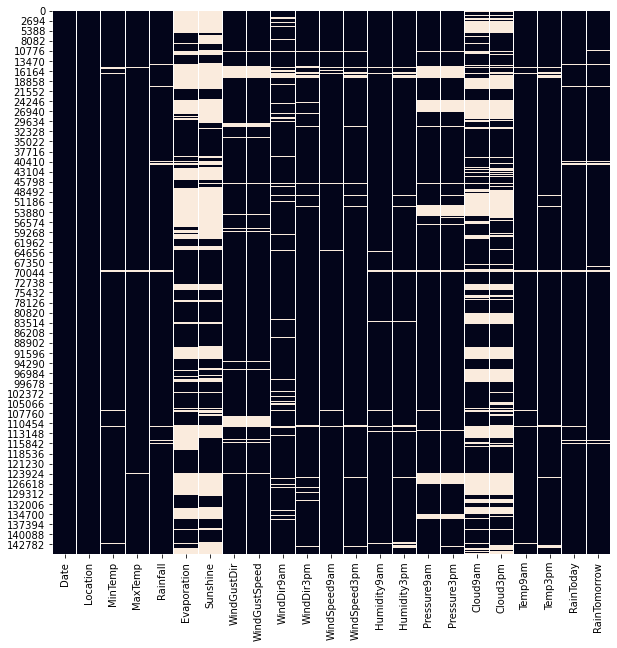

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

# Drop all records containing even one null value

In [6]:
df.dropna(inplace=True)

# Check null values

<AxesSubplot:>

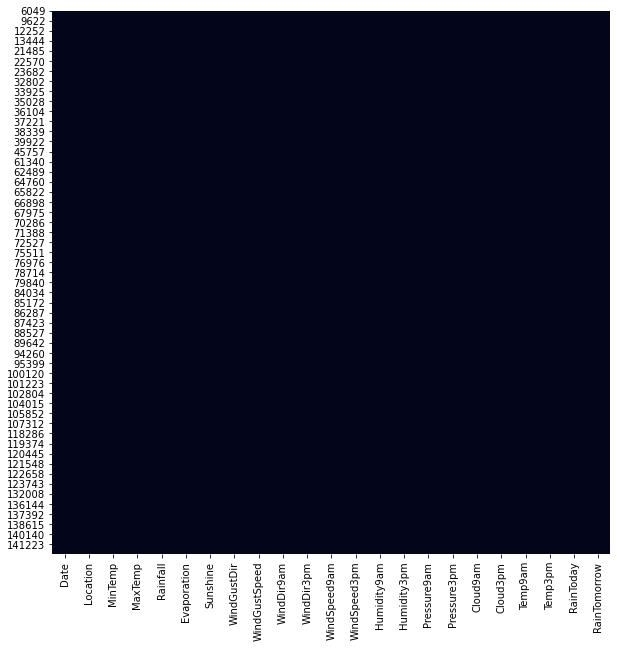

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

# Reset Index since many records have been deleted

In [8]:
df.reset_index(drop=True,inplace=True)

# selected colums that can me used to create the ml model, and which ones would simply be to complicated to operate on

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3

# Unwanted columns taken out

In [10]:
df.drop(['Date', 'Location','WindDir9am', 'WindDir3pm'],axis=1,inplace=True)

# Check columns now

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustDir    56420 non-null  object 
 6   WindGustSpeed  56420 non-null  float64
 7   WindSpeed9am   56420 non-null  float64
 8   WindSpeed3pm   56420 non-null  float64
 9   Humidity9am    56420 non-null  float64
 10  Humidity3pm    56420 non-null  float64
 11  Pressure9am    56420 non-null  float64
 12  Pressure3pm    56420 non-null  float64
 13  Cloud9am       56420 non-null  float64
 14  Cloud3pm       56420 non-null  float64
 15  Temp9am        56420 non-null  float64
 16  Temp3pm        56420 non-null  float64
 17  RainToday      56420 non-null  object 
 18  RainTo

In [12]:
#Extrapolate meaningful and usable (binary) data from 'WindGustDir' column into
#fN indicating 'From North', 
#fS indicating 'From South',
#fW indicating 'From West',
#fE is IGNORED since if all the other columns are 0 it is automatically assumed From East

In [13]:
def swap1(x):
    if x[0]=="N":
        return 1
    else:
        return 0

In [14]:
def swap2(x):
    if x[0]=="S":
        return 1
    else:
        return 0

In [15]:
def swap3(x):
    if x[0]=="W":
        return 1
    else:
        return 0

In [16]:
df["fN"]=df["WindGustDir"].apply(swap1)
df["fS"]=df["WindGustDir"].apply(swap2)
df["fW"]=df["WindGustDir"].apply(swap3)

# View extrapolated information to verify validity

In [17]:
df[["WindGustDir","fN","fS","fW"]].head()

,WindGustDir,fN,fS,fW
0,SSW,0,1,0
1,S,0,1,0
2,NNE,1,0,0
3,WNW,0,0,1
4,WNW,0,0,1


In [18]:
#We must now repeat the same to extrapolate meaning from the end direction, 
#tN indicating 'to North', 
#tS indicating 'to South',
#tW indicating 'to West',
#tE indicating 'to East', this column is not ignored here since sometimes there is no end direction

In [19]:
df["WindGustDir"].loc[0][-1:] #Checking how to call last element of WindGustDir element, [-1:] means last character

'W'

In [20]:
len(df["WindGustDir"].loc[0]) #Checking how to call length of WindGustDir element

3

In [21]:
def backswap1(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="N":
            return 1
        else:
            return 0

In [22]:
def backswap2(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="E":
            return 1
        else:
            return 0

In [23]:
def backswap3(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="S":
            return 1
        else:
            return 0

In [24]:
def backswap4(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="W":
            return 1
        else:
            return 0

In [25]:
df["tN"]=df["WindGustDir"].apply(backswap1)
df["tE"]=df["WindGustDir"].apply(backswap2)
df["tS"]=df["WindGustDir"].apply(backswap3)
df["tW"]=df["WindGustDir"].apply(backswap4)

# View extrapolated information to verify validity

In [26]:
df[["WindGustDir","fN","fS","fW","tN","tE","tS","tW"]].head()

,WindGustDir,fN,fS,fW,tN,tE,tS,tW
0,SSW,0,1,0,0,0,0,1
1,S,0,1,0,0,0,0,0
2,NNE,1,0,0,0,1,0,0
3,WNW,0,0,1,0,0,0,1
4,WNW,0,0,1,0,0,0,1


# Preprocessed dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustDir    56420 non-null  object 
 6   WindGustSpeed  56420 non-null  float64
 7   WindSpeed9am   56420 non-null  float64
 8   WindSpeed3pm   56420 non-null  float64
 9   Humidity9am    56420 non-null  float64
 10  Humidity3pm    56420 non-null  float64
 11  Pressure9am    56420 non-null  float64
 12  Pressure3pm    56420 non-null  float64
 13  Cloud9am       56420 non-null  float64
 14  Cloud3pm       56420 non-null  float64
 15  Temp9am        56420 non-null  float64
 16  Temp3pm        56420 non-null  float64
 17  RainToday      56420 non-null  object 
 18  RainTo

# Removing 'WindGustDir' column, now that we extrapolated information we no longer need it in dataset

In [28]:
df.drop("WindGustDir",axis=1,inplace=True)

# Checking data type of 'RainToday' and 'RainTomorrow' columns

In [29]:
df[["RainToday","RainTomorrow"]].head()

,RainToday,RainTomorrow
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No


# Our logistic regression model will not work with boolean/categorical data, we need to convert this to binary

In [30]:
marker1=pd.get_dummies(df["RainToday"],drop_first=True)
marker2=pd.get_dummies(df["RainTomorrow"],drop_first=True)

In [31]:
df["RainToday"]=marker1
df["RainTomorrow"]=marker2

# Check result

In [32]:
df[["RainToday","RainTomorrow"]].head()

,RainToday,RainTomorrow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [33]:
df.info() #Check all columns now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  uint8  
 17  RainTomorrow   56420 non-null  uint8  
 18  fN    

# Preprocessing Complete, Save new dataset to csv file

In [34]:
df.to_csv("Weather prediction model\precleaned_data.csv")

# Carry out Machine Learning Phase

Split dataset into input and output columns (x) & (y)

In [35]:
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

#Split dataset into 2 new datasets, Train Data (x) & Test Data (y)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

#Train the model with input and desired output from train data

In [37]:
lm=LogisticRegression()

In [38]:
lm.fit(x_train,y_train)

C:\Users\DIGITAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model is now created, we can now test it by only feeding input from Test Data

In [39]:
pred=lm.predict(x_test)

# Evaluate accuracy of your model by comparing your Predicted Output vs. Actual Output for Test Data

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13193
           1       0.73      0.51      0.60      3733

    accuracy                           0.85     16926
   macro avg       0.80      0.73      0.76     16926
weighted avg       0.84      0.85      0.84     16926

